In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

     Modelo     Marca   Preco       Data     Fonte
0   RX 6600    ASRock  1599.9 2025-04-10  terabyte
1   RX 7600      ASUS  1899.9 2025-04-10  terabyte
2  RTX 4070  Gigabyte  4999.9 2025-04-10  terabyte
3  RTX 3060    Inno3D  2149.9 2025-04-10  terabyte
4   RX 7600       XFX  1949.9 2025-04-10  terabyte


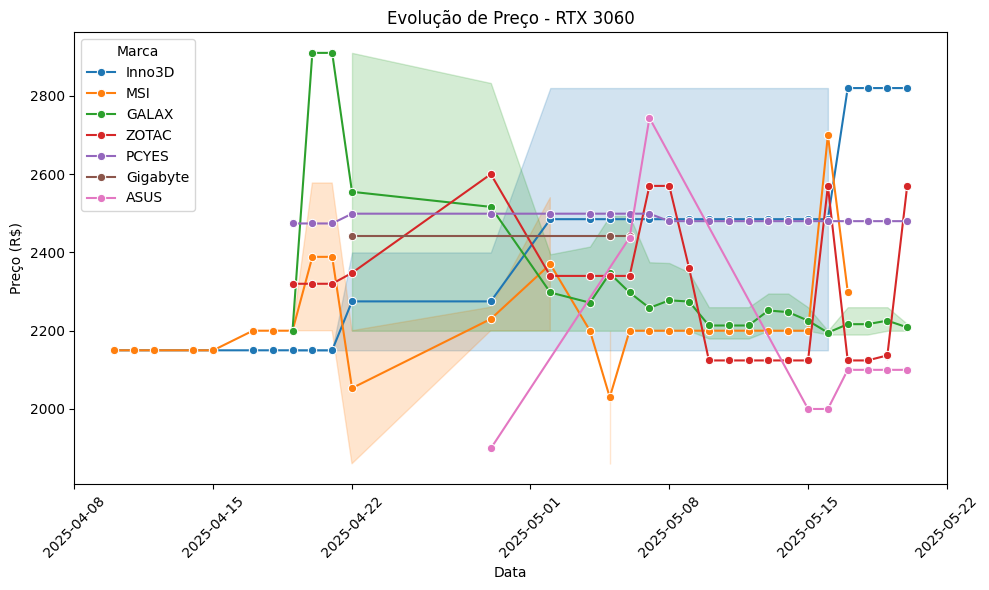

In [8]:
df = pd.read_csv('gpu_data_real.csv', header=None, names=['Modelo', 'Marca', 'Preco', 'Data', 'Fonte'])

df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Preco'] = pd.to_numeric(df['Preco'], errors='coerce')

print(df.head())

modelo_desejado = 'RTX 3060'
df_modelo = df[df['Modelo'] == modelo_desejado]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_modelo, x='Data', y='Preco', hue='Marca', marker='o')
plt.title(f'Evolução de Preço - {modelo_desejado}')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

     Modelo       Data       Preco
0  RTX 3080 2022-11-01  790.000000
1  RTX 3080 2022-12-01  902.142857
2  RTX 3080 2023-01-01  938.444444
3  RTX 3080 2023-02-01  925.750000
4  RTX 3080 2023-03-01  880.733333


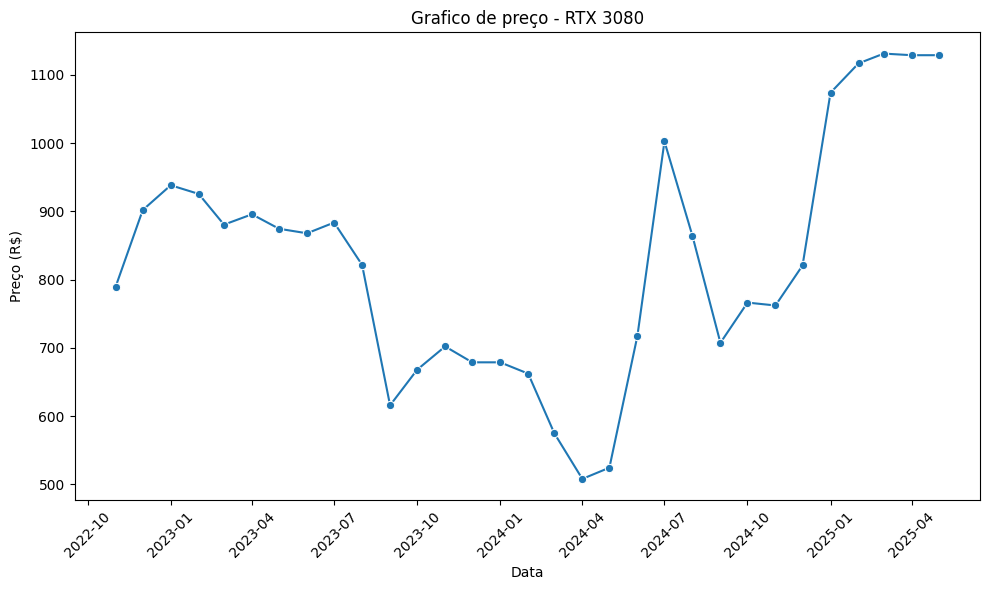

In [9]:
df = pd.read_csv('3080_data.csv', header=None, names=['Modelo', 'Data', 'Preco'])

df['Data'] = pd.to_datetime(df['Data'], errors='coerce')
df['Preco'] = pd.to_numeric(df['Preco'], errors='coerce')

print(df.head())

modelo_desejado = 'RTX 3080'
df_modelo = df[df['Modelo'] == modelo_desejado]

plt.figure(figsize=(10, 6))
sns.lineplot(data=df_modelo, x='Data', y='Preco', marker='o')
plt.title(f'Grafico de preço - {modelo_desejado}')
plt.xlabel('Data')
plt.ylabel('Preço (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\y\AppData\Local\Temp\ipykernel_8392\1086975734.py:39: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_eth['Data'] = df_eth['Data'].dt.to_period('M').dt.to_timestamp()


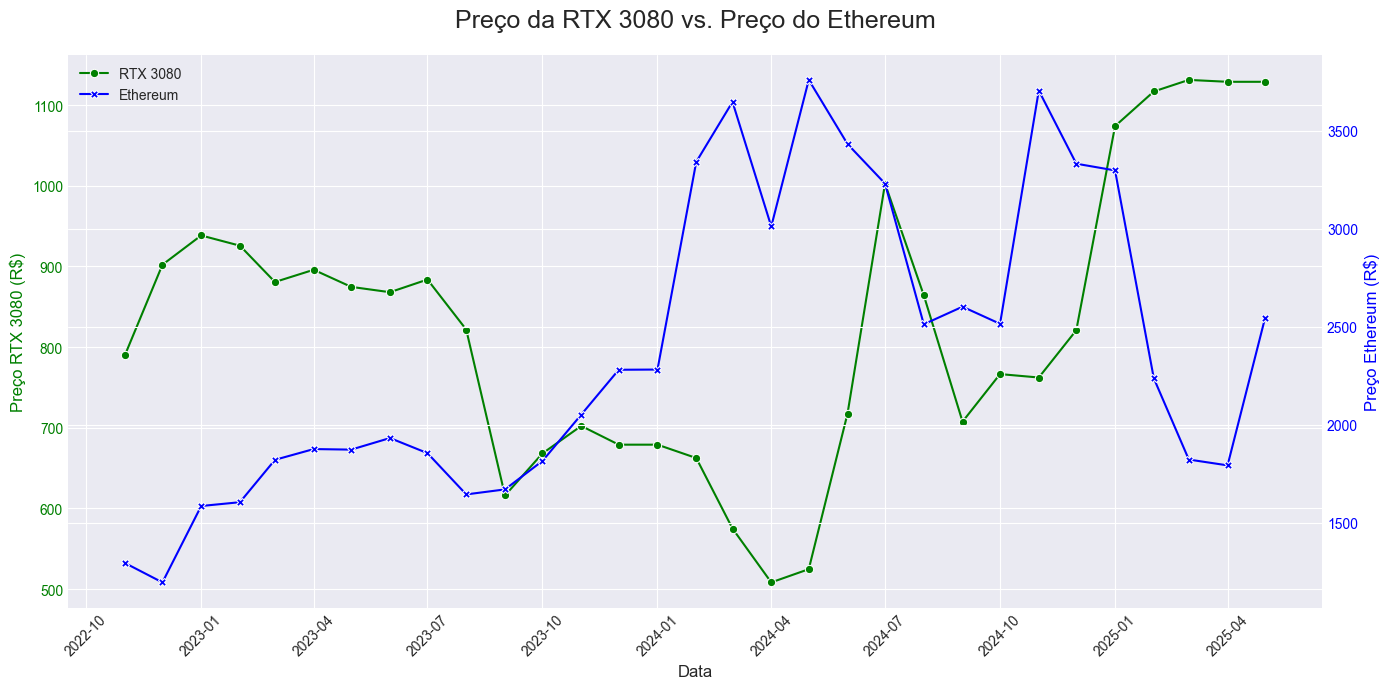

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- Carregamento e Preparação dos Dados ---

# 1. DADOS DA RTX 3080 (usando seu código como base)
# Tente ler o arquivo original do usuário, se existir.
try:
    df_3080 = pd.read_csv('3080_data.csv', header=None, names=['Modelo', 'Data', 'Preco'])
    df_3080 = df_3080[df_3080['Modelo'] == 'RTX 3080']
except FileNotFoundError:
    print("Arquivo '3080_data.csv' não encontrado. Usando dados de exemplo para a RTX 3080.")
    datas_3080 = pd.to_datetime([
        "2022-10-15", "2022-12-15", "2023-02-15", "2023-04-15", "2023-06-15",
        "2023-08-15", "2023-10-15", "2023-12-15", "2024-02-15", "2024-04-15"
    ])
    precos_3080 = [7850, 9380, 8800, 8700, 8800, 6150, 7000, 6800, 5250, 7150]
    df_3080 = pd.DataFrame({'Data': datas_3080, 'Preco': precos_3080})

# Padronizando os dados da 3080
df_3080['Data'] = pd.to_datetime(df_3080['Data'], errors='coerce')
df_3080['Preco'] = pd.to_numeric(df_3080['Preco'], errors='coerce')
df_3080['Data'] = df_3080['Data'].dt.to_period('M').dt.to_timestamp()
df_3080_monthly = df_3080.groupby('Data')['Preco'].mean().reset_index()


# 2. DADOS DO ETHEREUM (carregando do arquivo que você enviou)
df_eth_raw = pd.read_csv('ETH.csv', sep=';')
df_eth = df_eth_raw[['timestamp', 'close']].copy()
df_eth.rename(columns={'timestamp': 'Data', 'close': 'Preco_ETH'}, inplace=True)

# Converter a coluna 'Data' para o formato datetime
# ***** LINHA CORRIGIDA AQUI *****
df_eth['Data'] = pd.to_datetime(df_eth['Data'], format='ISO8601')

# Agrupar por mês para corresponder com os dados da 3080
df_eth['Data'] = df_eth['Data'].dt.to_period('M').dt.to_timestamp()
df_eth_monthly = df_eth.groupby('Data')['Preco_ETH'].mean().reset_index()


# 3. JUNTAR (MERGE) OS DOIS DATAFRAMES
df_merged = pd.merge(df_3080_monthly, df_eth_monthly, on='Data', how='inner')

# --- Criação do Gráfico Combinado ---

plt.style.use('seaborn-v0_8-darkgrid')
fig, ax1 = plt.subplots(figsize=(14, 7))

color_ax1 = 'green'
ax1.set_xlabel('Data', fontsize=12)
ax1.set_ylabel('Preço RTX 3080 (R$)', color=color_ax1, fontsize=12)
sns.lineplot(data=df_merged, x='Data', y='Preco', ax=ax1, color=color_ax1, marker='o', label='RTX 3080')
ax1.tick_params(axis='y', labelcolor=color_ax1)
ax1.tick_params(axis='x', rotation=45)

ax2 = ax1.twinx()
color_ax2 = 'blue'
ax2.set_ylabel('Preço Ethereum (R$)', color=color_ax2, fontsize=12)
sns.lineplot(data=df_merged, x='Data', y='Preco_ETH', ax=ax2, color=color_ax2, marker='X', label='Ethereum')
ax2.tick_params(axis='y', labelcolor=color_ax2)

# --- Finalização e Exibição ---

plt.title('Preço da RTX 3080 vs. Preço do Ethereum', fontsize=18, pad=20)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')
if ax2.get_legend():
    ax2.get_legend().remove()

fig.tight_layout()
plt.show()